<Figure size 432x288 with 0 Axes>

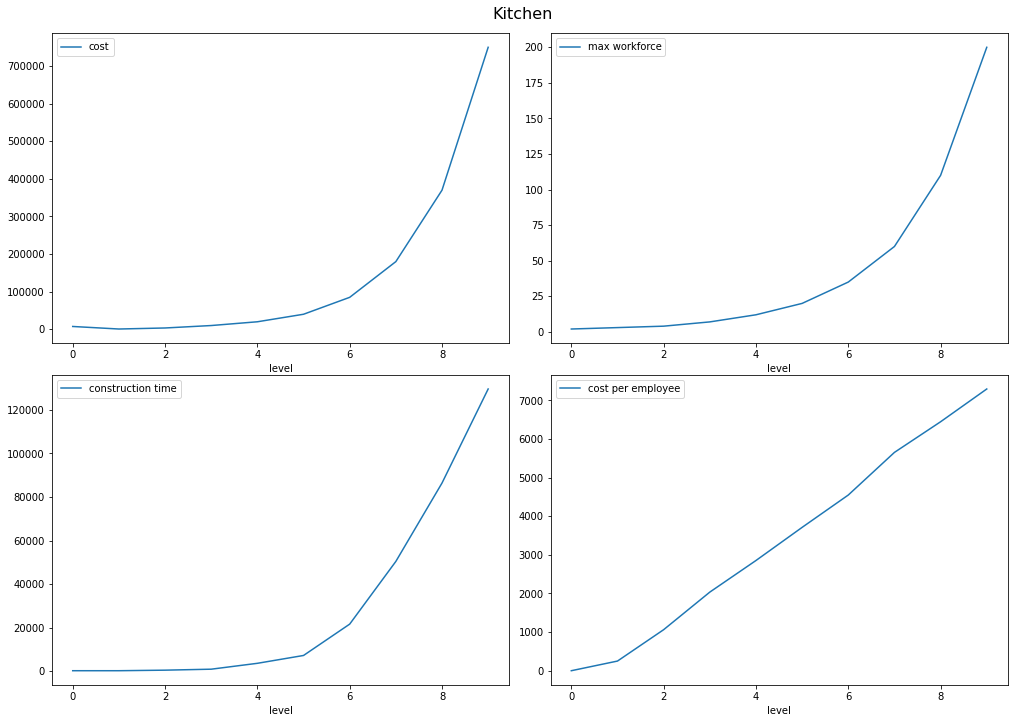

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0    7500               200                      2       7500   
1     750               200                      3       8250   
2    3500               450                      4      11750   
3   10000               900                      7      21750   
4   20000              3600                     12      41750   
5   40000              7200                     20      81750   
6   85000             21600                     35     166750   
7  180000             50400                     60     346750   
8  370000             86400                    110     716750   
9  750000            129600                    200    1466750   

   employer.costPerEmployee  
0                  0.000000  
1                250.000000  
2               1062.500000  
3               2035.714286  
4               2854.166667  
5               3712.500000  
6               4550.000000  
7               5654.166667  
8             

<Figure size 432x288 with 0 Axes>

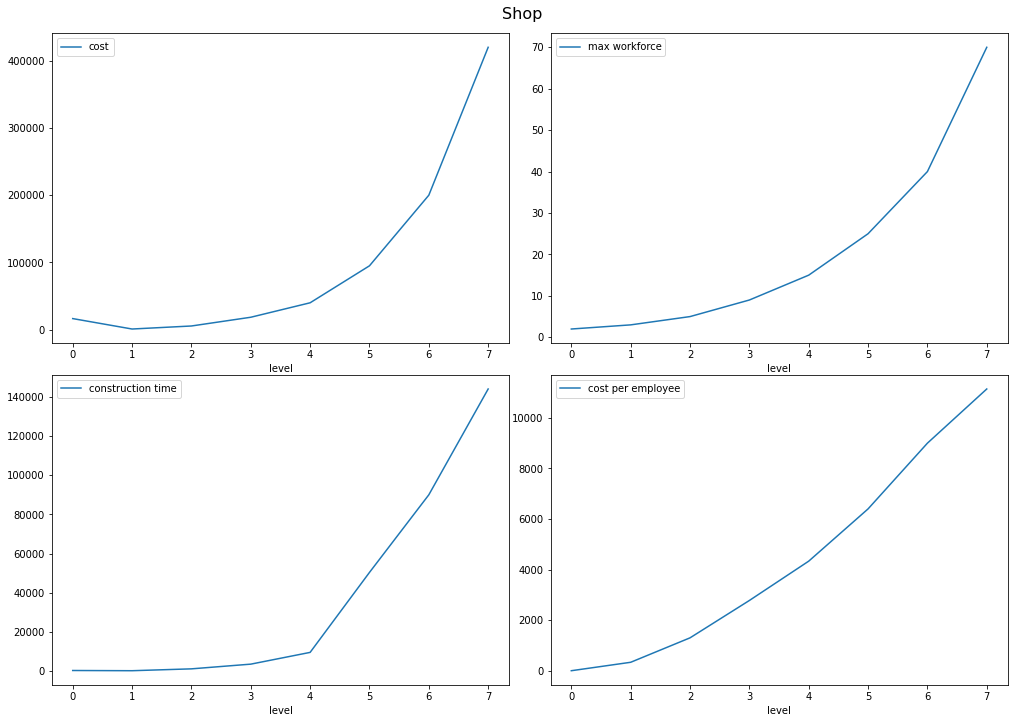

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0   16500               360                      2      16500   
1    1000               250                      3      17500   
2    5500              1200                      5      23000   
3   18500              3600                      9      41500   
4   40000              9600                     15      81500   
5   95000             50400                     25     176500   
6  200000             90000                     40     376500   
7  420000            144000                     70     796500   

   employer.costPerEmployee  
0                  0.000000  
1                333.333333  
2               1300.000000  
3               2777.777778  
4               4333.333333  
5               6400.000000  
6               9000.000000  
7              11142.857143  




<Figure size 432x288 with 0 Axes>

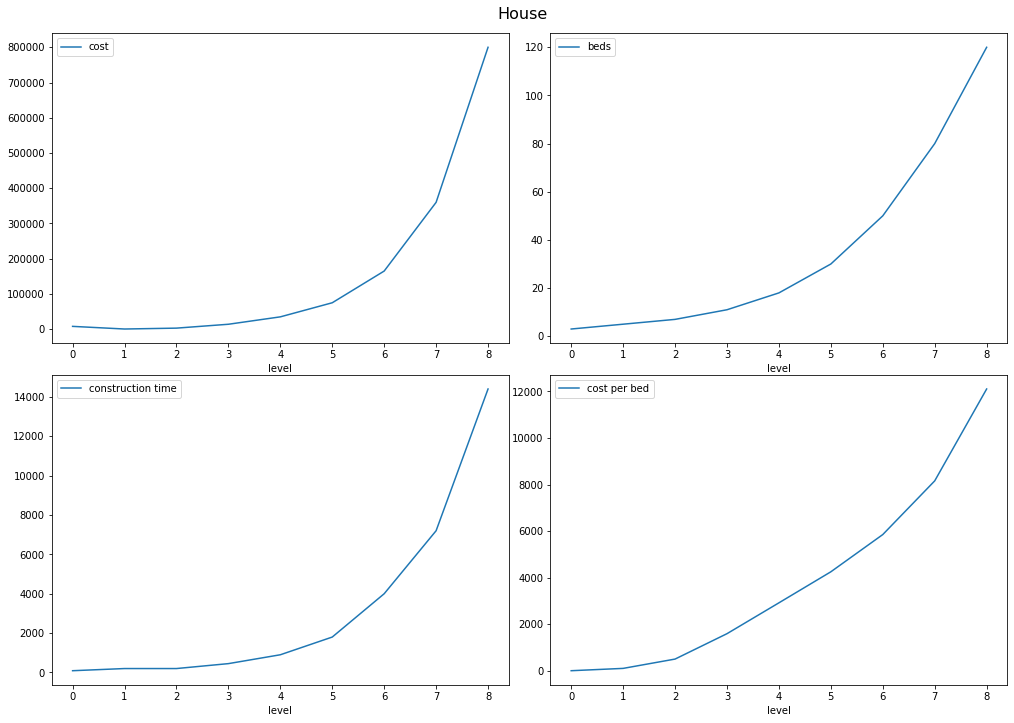

     cost  constructionTime  residence.beds  costTotal  residence.costPerBed
0    8000                90               3       8000              0.000000
1     500               200               5       8500            100.000000
2    3000               200               7      11500            500.000000
3   14000               450              11      25500           1590.909091
4   35000               900              18      60500           2916.666667
5   75000              1800              30     135500           4250.000000
6  165000              4000              50     300500           5850.000000
7  360000              7200              80     660500           8156.250000
8  800000             14400             120    1460500          12104.166667


    cost  constructionTime  costTotal
0  30000              1500      30000




<Figure size 432x288 with 0 Axes>

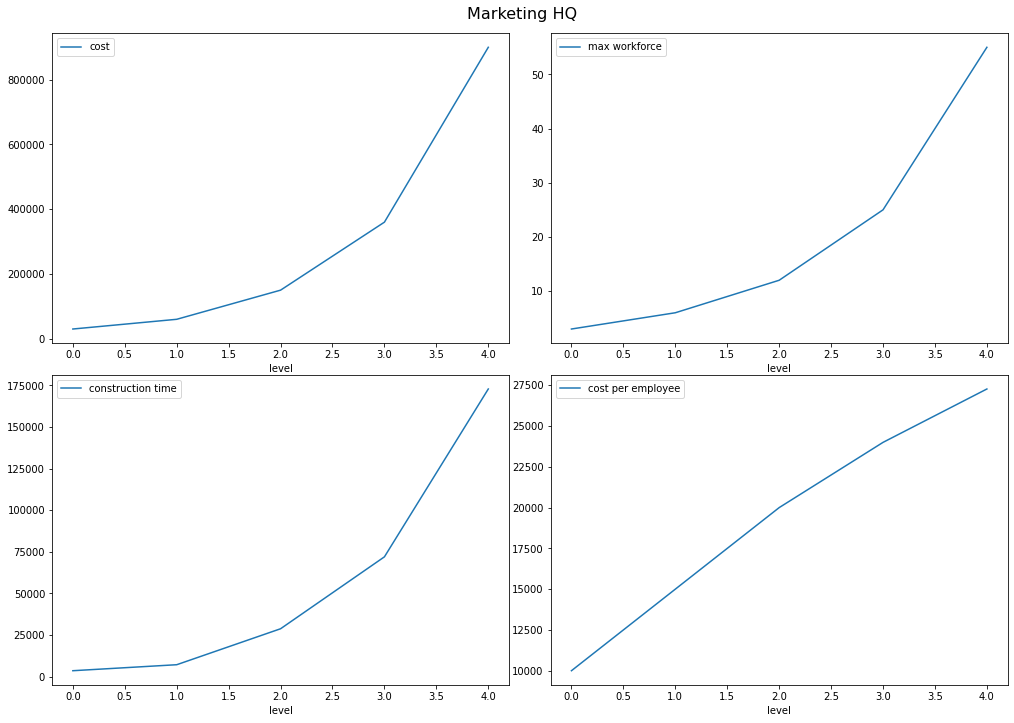

     cost  constructionTime  employer.maxWorkforce  costTotal  \
0   30000              3600                      3      30000   
1   60000              7200                      6      90000   
2  150000             28800                     12     240000   
3  360000             72000                     25     600000   
4  900000            172800                     55    1500000   

   employer.costPerEmployee  
0              10000.000000  
1              15000.000000  
2              20000.000000  
3              24000.000000  
4              27272.727273  


     cost  constructionTime  costTotal
0  200000              9600     200000


KeyError: 'cost'

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import requests, json
%matplotlib inline

url = requests.get("http://localhost:3000/api/gamedata")
data = json.loads(url.text)

skipFirst = ['Kitchen', 'Shop', 'House']

for k in data['buildings']:
    b = data['buildings'][k]

    df = pd.json_normalize(b['levelInfos'], max_level=1)
    df['costTotal'] = df['cost'].cumsum()
    
    print('\n')
    
    if len(b['levelInfos']) < 2:
        print(df)
        continue
        
    building = b['title']
    
    plt.figure()
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    fig.suptitle(building, fontsize=16)
    fig.tight_layout()
    
    axes[0, 0].set_xlabel('level')
    axes[1, 0].set_xlabel('level')
    axes[0, 1].set_xlabel('level')
    axes[1, 1].set_xlabel('level')
    
    df['cost'].plot(ax=axes[0, 0], legend=True)
    
    df['constructionTime'].plot(ax=axes[1, 0], legend=True, label='construction time')
    
    
    if 'employer.maxWorkforce' in df:
        if building in skipFirst:
            df['employer.costPerEmployee'] =  df['cost'].iloc[1:].cumsum() / df['employer.maxWorkforce']
            df.loc[df.index[0], 'employer.costPerEmployee'] = 0
        else:
            df['employer.costPerEmployee'] =  df['cost'].cumsum() / df['employer.maxWorkforce']
        
        df['employer.maxWorkforce'].plot(ax=axes[0, 1], legend=True, label='max workforce')
        df['employer.costPerEmployee'].plot(ax=axes[1, 1], legend=True, label='cost per employee')
        
    if 'residence.beds' in df:
        if building in skipFirst:
            df['residence.costPerBed'] = df['cost'].iloc[1:].cumsum() / df['residence.beds']
            df.loc[df.index[0], 'residence.costPerBed'] = 0
        else:
            df['residence.costPerBed'] = df['cost'].cumsum() / df['residence.beds']
            
        df['residence.beds'].plot(ax=axes[0 , 1], legend=True, label='beds')
        df['residence.costPerBed'].plot(ax=axes[1, 1], legend=True, label='cost per bed')
        
    plt.show()
    print(df)

